In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/train.csv')

#==============================================
#    To understand the distribution of the data, we go for describe() function
#==============================================

# print(df.head())
print(df.info())
print(df.head())
print(df.describe())
# Finding the missing values in each column to identify which columns to drop
print(df.isnull().sum())
# print(df['Cabin'].unique())
print(len(df))

# So from the results, we see that out of 891 rows, 687 values are missing for Cabin. This column would be an ideal one to remove to get valuable insights.

FileNotFoundError: [Errno 2] No such file or directory: 'data/train.csv'

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


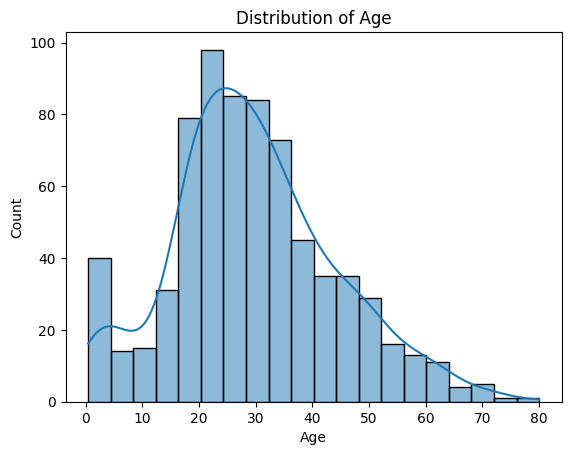

C:\Users\preen\AppData\Local\Temp\ipykernel_12904\3599689036.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace = True)


<Axes: xlabel='Age', ylabel='Count'>

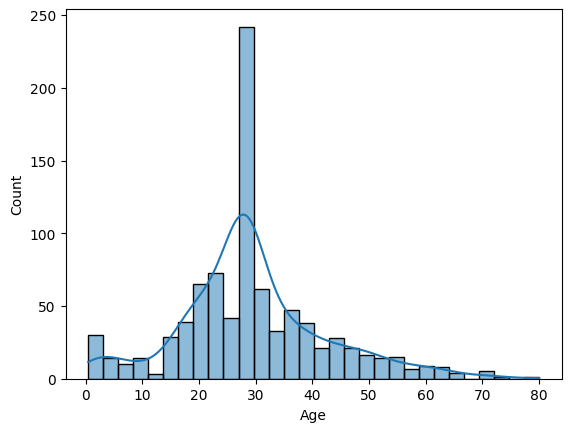

In [ ]:
#==============================================
#    Data Cleanup and understanding procedues
#==============================================

# Handling missing data
print(df.isnull().sum())
# From the output, it is clear that Age has 177 empty values and Cabin has 687 missing values
# Since Age is a meaningful column, we should fill the empty field with median or mean value
# If the data is normally distributed, mean is a good choice and if it is skewed, then median is a good choice.

# Plotting a histogram to see if Age is symmetrically distributed.
sns.histplot(df['Age'], kde = True) # kde adds a smoother curve along with the bar plots
plt.title('Distribution of Age')
plt.show()
# Since Age is not symmetrically distributed, we choose median for the empty values. Also, median is less sensitive to outliers when compared to mean.

# Replacing empty values in Age with the median value

# inplace parameter could be either True or False.
# If True, the original df is modified directly.
# If False, the original df is not modified but instead a copy of the df is created and then modified. The original df is not altered.

df['Age'].fillna(df['Age'].median(), inplace = True)
sns.histplot(df['Age'], kde = True) 
# Categorical columns that have empty values could be filled using the most frequently occuring value (mode)
# For irrelevant columns, thosse can be dropped.


In [ ]:
#==============================================
#    Dropping unwanted column
#==============================================

df.drop(['Cabin'], axis = 1, inplace = True)
df.drop(['Name'], axis=1, inplace= True)
df.drop(['Ticket'],axis=1, inplace=True)

# axis determines whether it is rows or columns that has to be deleted. 
# df.drop([0,1,2], axis = 0) will drop all the rows at indices 0,1,2
# default value for inplace is False. If nothing is specified, this is put into action
print(df.head())

# Removing empty values are very important as too many missing values can impact the model perfoemance or lead to unnecessary complexity.

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S


In [ ]:
df['FamilySize'] = df['SibSp']+df['Parch']+1
df.drop(['SibSp'], axis=1, inplace=True)
df.drop(['Parch'], axis=1, inplace=True)

In [ ]:
print(df.dtypes)
print(df['Sex'])

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
Fare           float64
Embarked        object
FamilySize       int64
dtype: object
0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object


In [ ]:
# Converting cateegorical values to numerical values as part of Feature Engineering
# Converting the column with only 2 category
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
print(df['Embarked'].unique())

['S' 'C' 'Q' nan]


In [ ]:
# Converting categorical columns with more than 2 categories into numeric
emb_cnt = df['Embarked'].value_counts()
print(emb_cnt)
# One-hot encoding will create a column for each class in Embarked and if a passenger boarded from C,
# then the value for Embarked_C would be 1 and Embarked_Q and Embarked_S would be 0 - increases dimensionality
df = pd.get_dummies(df, columns=['Embarked'], drop_first=False)

# Replacing the values in the Embarked column with the most frequent value
# df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

# Label Encoding
# df['Embarked'] = df['Embarked'].map({'C':0,'Q':1,'S':2})

# One-hot encoding
# df = pd.get_dummies(df, columns = ['Embarked'])

# Frequency or Count encoding
# freq_map = df['Embarked'].value_counts() / len(df)
# df['Embarked'] = df['Embarked'].map(freq_map)

# Target or mean encoding


# Ordinal encoding

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


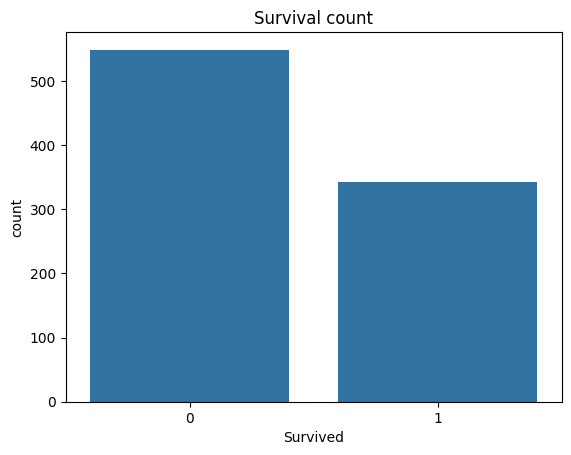

Survived
0    549
1    342
Name: count, dtype: int64


In [ ]:
##############################################################################
#        Exploratory Data Analysis (EDA)
##############################################################################
# 1. Univariate analysis: Analyzing TV with each of the significant features such as Age, PClass, Sex

sns.countplot(data=df, x='Survived')
plt.title("Survival count")
plt.show()
a = df['Survived'].value_counts()
print(a)
# Not survived: 549 and Survived: 342

Sex
Male      0.188908
Female    0.742038
Name: Survived, dtype: float64


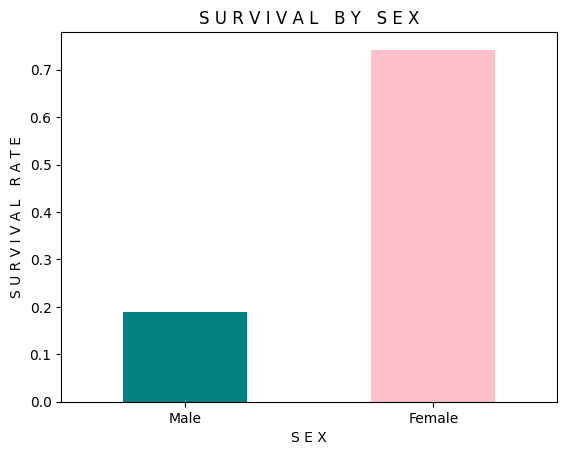

In [ ]:
# Survival rate by Sex

survival_by_sex = df.groupby('Sex')['Survived'].mean()
survival_by_sex.index = survival_by_sex.index.map({0:'Male',1:'Female'})

print(survival_by_sex)

survival_by_sex.plot(kind='bar',color=['teal','pink'])
plt.title("S U R V I V A L   B Y   S E X")
plt.xlabel("S E X")
plt.ylabel("S U R V I V A L   R A T E")
plt.xticks(rotation = 0)
plt.show()

In [ ]:
df.head()
df = df.applymap(lambda x: 1 if x == True else (0 if x == False else x))
print(df)

NameError: name 'df' is not defined

In [ ]:
# Since the target variable here is "Survived" which has two categories.
# Hence this is a classification problem.
# For a classification problem, we typically use the following model - 
# Linear models - Logistic Regression
# Tree models - Decision tree, Random Forest
# Support Vector Machine (SVN) - effective for high dimensional data
# K-Nearest Neighbour (KNN) - A  simple instance model that is expensive computationally
# Gradient Boosting (XBoost or LightGBM) - accurate and efficient
# NN 

# importing all libraries required for all the models
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

x = df.drop("Survived", axis=1)
y = df["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

log_model = LogisticRegression()
log_model.fit(x_train, y_train)

tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

svc_model = SVC()
svc_model.fit(x_train, y_train)

# Evaluate models
models = {
    "Logistic Regression": log_model, 
    "Random Forest": rf_model, 
    "Decision Tree": tree_model, 
    "SVC Model": svc_model
}

# Accuracy - is the metrics that tells how often the model predicts correctly
# Precision - out of all the positive predictions, how many are correct (important if false positives are costly)
# Recall - out of all actual positives, how many were correctly predicted (important if false negatives are costly)

for name, model in models.items():
    y_pred = model.predict(x_test)
    print(f"{name}")
    print(f"*  Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"*  Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"*  Recall: {recall_score(y_test, y_pred):.2f}")

#    Logistic Regression
#    *  Accuracy: 0.79
#    *  Precision: 0.78
#    *  Recall: 0.70
#    Random Forest
#    *  Accuracy: 0.81
#    *  Precision: 0.83
#    *  Recall: 0.68
#    Decision Tree
#    *  Accuracy: 0.77
#    *  Precision: 0.74
#    *  Recall: 0.68
#    SVC Model
#    *  Accuracy: 0.61
#    *  Precision: 0.69
#    *  Recall: 0.10

# From the above metriccs, Random Forest indeed performs the best based on accuracy and precision
# But Recall is slightly lower than Logistic Regression (0.7), which may be a concern.
# Recall is important if false negatives are expensive. In this scenario, it is important that the model predicts the survivors correctly. 
# It is pertinent that survivors are not missed. Therefore, recall is important.

# To avoid overfitting, cross-validation must be done.

for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=5)
    print(f"{name}: Average CV accuracy = {scores.mean():.2f}")

# We performed cross validation to ensure that random forest model is the right choice and  from the results, it is evident that the Random Forest model is consistently the best performer.
# Cross validation results show that RF model generalizes better to unseen data compared to others.

# Plotting feature importance

importance = rf_model.feature_importances_
features = x.columns

plt.barh(features, importance)
plt.xlabel("Feature importance")
plt.ylabel("Random forest feature importance")
plt.show()

NameError: name 'df' is not defined

In [ ]:
# Hyperparameter tuning - setting parameters before the model is trained that guides how the model learns.
# Hyperparameter tuning would improve accuracy, reduce overfitting and make the model faster and efficient

# Choosing Random forest model since it has high 5-fold cross validation accuracy value and precision value
# Performing hyperparamter tuning for random forest model to improve recall value

from sklearn.model_selection import GridSearchCV

# Defining parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5 , 10]
}

# Initializing Grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters: ", grid_search.best_params_)
best_param = grid_search.best_params_

NameError: name 'rf_model' is not defined

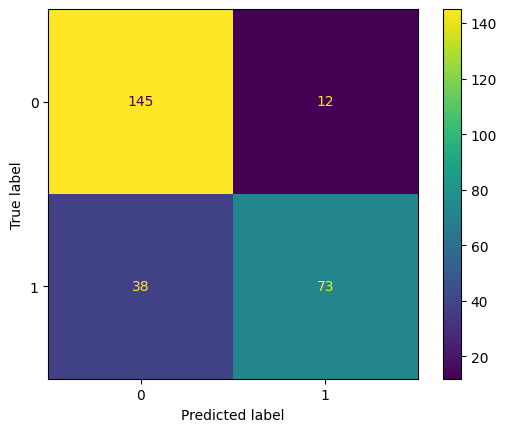

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


In [ ]:
# Now that we know the best parameters, we initialize the random forest model with the best parameters

from sklearn.ensemble import RandomForestClassifier

# Initializing the model with the best parameters
tuned_rf_model = RandomForestClassifier(
    n_estimators = best_param["n_estimators"],
    max_depth = best_param["max_depth"],
    min_samples_split = best_param["min_samples_split"],
    class_weight="balanced",  # Balancing the class. Many algorithms such a s Random Forest allows you to assign different class weights. We are trying to predict the survived passengers correctly. If the majority of passengers have not survived, then there could be a class imbalance and we could eb encouraging the model to predict the majority class (non-survivors). 
    # max_features='sqrt',  # Reduce the number of features to consider at each split
    # min_samples_leaf=6,  # Prevent overfitting by making each leaf node contain more samples
    random_state=42
)

# Training the tuned model
tuned_rf_model.fit(x_train, y_train)

# Evaluate the tuned model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Predicing on the testing data
y_pred = tuned_rf_model.predict(x_test)
# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

NameError: name 'best_param' is not defined

In [ ]:
import joblib
joblib.dump(tuned_rf_model, "titanic_model.pkl")

NameError: name 'tuned_rf_model' is not defined